In [1]:
from temp_profile import TempProfile2D
from eutectic_interface import EuteticInterface

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import glob
from scipy.signal import find_peaks, peak_prominences

In [2]:
twod_paths = glob.glob('../data/gaia/temp_profile/europa/EuropaParameterStudy/*_2D_data.txt')
twod_paths

['../data/gaia/temp_profile/europa/EuropaParameterStudy/Europa_D30km_eta1e+15_2D_data.txt',
 '../data/gaia/temp_profile/europa/EuropaParameterStudy/Europa_D25km_eta1e+12_2D_data.txt',
 '../data/gaia/temp_profile/europa/EuropaParameterStudy/Europa_D60km_eta1e+14_2D_data.txt',
 '../data/gaia/temp_profile/europa/EuropaParameterStudy/Europa_D90km_eta1e+14_2D_data.txt',
 '../data/gaia/temp_profile/europa/EuropaParameterStudy/Europa_D25km_eta1e+14_2D_data.txt',
 '../data/gaia/temp_profile/europa/EuropaParameterStudy/Europa_D40km_eta1e+15_2D_data.txt',
 '../data/gaia/temp_profile/europa/EuropaParameterStudy/Europa_D90km_eta1e+12_2D_data.txt',
 '../data/gaia/temp_profile/europa/EuropaParameterStudy/Europa_D60km_eta1e+12_2D_data.txt',
 '../data/gaia/temp_profile/europa/EuropaParameterStudy/Europa_D90km_eta1e+15_2D_data.txt',
 '../data/gaia/temp_profile/europa/EuropaParameterStudy/Europa_D60km_eta1e+15_2D_data.txt',
 '../data/gaia/temp_profile/europa/EuropaParameterStudy/Europa_D25km_eta1e+13_2D

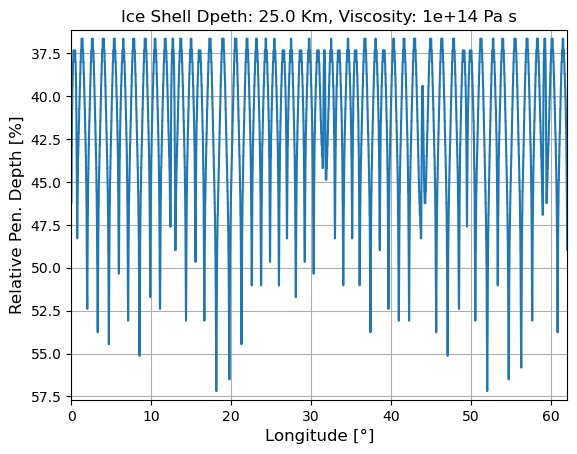

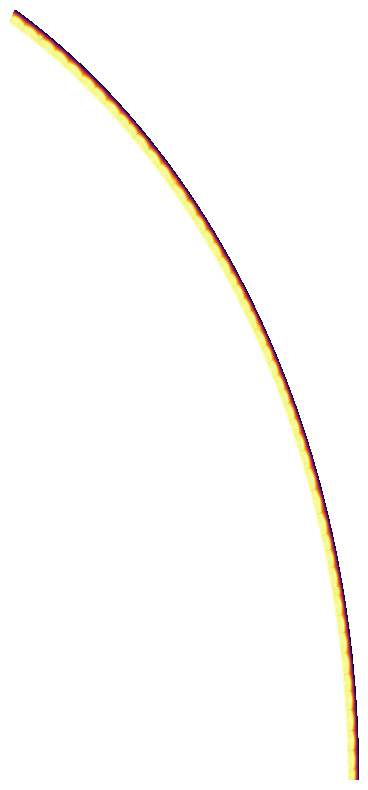

In [3]:
example_proflile = TempProfile2D.from_filepath(twod_paths[4])

example_proflile.plot_relative_eutectic_depth()
example_proflile.plot_temp_twod()

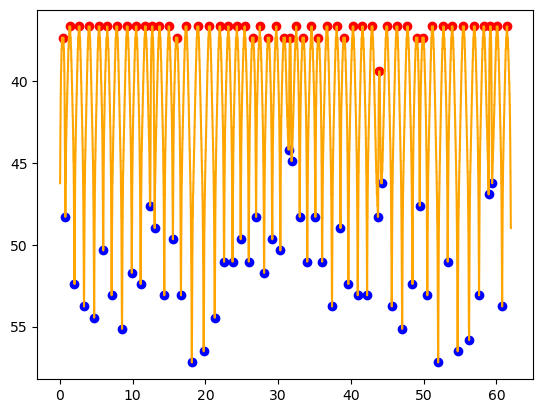

In [4]:
y = example_proflile.eutectic.relative_depth
x = example_proflile.eutectic.longitude_span

downwellings_index = find_peaks(y)[0]
x_down = x[downwellings_index]
y_down = y[downwellings_index]

upwelling_index = find_peaks(-y)[0]
x_up = x[upwelling_index]
y_up = y[upwelling_index]


plt.plot(x, y, color = 'orange')
plt.scatter(x_down, y_down, color = 'blue')
plt.scatter(x_up, y_up, color = 'red')

ax = plt.gca()
ax.invert_yaxis()

In [5]:
(sum(y_down) - sum(y_up))/example_proflile.eutectic.num_of_convection_cells

13.560615384615193

In [6]:
y_up

array([37.328, 36.644, 36.644, 36.644, 36.644, 36.644, 36.644, 36.644,
       36.644, 36.644, 36.644, 36.644, 36.644, 37.328, 36.644, 36.644,
       36.644, 36.644, 36.644, 36.644, 36.644, 37.328, 36.644, 37.328,
       36.644, 37.328, 37.328, 36.644, 37.328, 36.644, 37.328, 36.644,
       36.644, 37.328, 36.644, 36.644, 36.644, 39.384, 36.644, 36.644,
       36.644, 37.328, 37.328, 36.644, 36.644, 36.644, 36.644, 36.644,
       36.644, 36.644, 36.644, 36.644])